In [ ]:
import numpy as np
from numpy.random import random, randn,binomial
from matplotlib import pyplot as plt, animation, rcParams, rc
#import math

In [ ]:
def square_function(gamma, beta, alpha,x):
    return gamma*x**2 + beta*x + alpha

rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3


beta_true = 6.0
alpha_true = 3.0
gamma_true = 10.0
n = 300
x = random(n)
y = square_function(gamma_true,alpha_true,beta_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
gamma = 2.

learning_rate = 0.01

In [ ]:
def update_alpha_and_beta():
    global alpha, beta,gamma
    y_predicted = square_function(gamma,beta,alpha,x)
    derivative_of_loss_wrt_gamma = 2*(x**2)*(y_predicted-y)
    derivative_of_loss_wrt_alpha = 2*(y_predicted-y)
    derivative_of_loss_wrt_beta = x * derivative_of_loss_wrt_alpha
    alpha = alpha - learning_rate * derivative_of_loss_wrt_alpha.mean()
    beta = beta - learning_rate * derivative_of_loss_wrt_beta.mean()
    gamma = gamma - learning_rate * derivative_of_loss_wrt_gamma.mean()

def animate(i):
    x = np.linspace(0,1,100)
    y = square_function(gamma,beta,alpha,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)

In [ ]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [ ]:
resulting_animation = animation.FuncAnimation(fig,animate,frames=np.arange(0,250),interval=100)

In [ ]:
resulting_animation

In [ ]:
# Notebook adapted from Jeremy P. Howard and Michal Fabinger

$y=\gamma x^2 + \beta x + \alpha$
<p></p>

<img src="files/huber1.png" />
Change notation from y to y-hat and f(x) to y. 
$\cfrac{\partial L(theta, y)}{\partial (dependentvars)}=0$
<p>For x inside quadratic area</p>
$\cfrac{\partial(loss)}{\partial \gamma}=2x^2(\hat y-y)$
$\cfrac{\partial(loss)}{\partial \beta}=2x(\hat y -y)$
$\cfrac{\partial(loss)}{\partial \alpha}=2(\hat y-y)$
<p>for x outside quadratic area</p>
$\cfrac{\partial(|loss|- .5*\delta^2)}{\partial \gamma}= \cfrac{loss}{|loss|} \cfrac{\partial (loss)}{\partial \gamma} = 
\cfrac{loss}{|loss|} x^2 $
<p></p>
$\cfrac{\partial(loss - .5*\delta^2)}{\partial \beta} = \cfrac{loss}{|loss|} \cfrac{\partial (loss)}{\partial \beta}=
\cfrac{loss}{|loss|} x$
<p></p>
$\cfrac{\partial(loss.5*\delta^2)}{\partial \alpha}=\cfrac{loss}{|loss|} \cfrac{\partial (loss)}{\partial \alpha} = 
\cfrac{loss}{|loss|} 1$
<p></p>
$\cfrac{\partial (| \hat y - \gamma x^2 + \beta x + alpha|) }{\partial \gamma} = x^2$
<p></p>
$\cfrac{\partial (| \hat y - \gamma x^2 + \beta x + alpha|) }{\partial \beta} = x$
<p></p>
$\cfrac{\partial (| \hat y - \gamma x^2 + \beta x + alpha|) }{\partial \alpha} =1 $
<p></p>

<h6>Squared Function</h6>

In [ ]:
import numpy as np
from numpy.random import random, randn,binomial
from matplotlib import pyplot as plt, animation, rcParams, rc
import math

In [ ]:
#It doesnt make sense to use a quadratic to approximate a linear function,so change the dataset to 
#be quadratic

def square_function(gamma, beta, alpha,x):
    return gamma*x**2 + beta*x + alpha

def square_function_outlier(gamma, beta, alpha,x):
    return square_function(gamma_true,beta_true,alpha_true,x)+0.2*randn(len(x)) + 4*binomial(1, 0.03, size=len(x)) + 4*binomial(1,0.01,size=len(x))

def loss(y,y_pred):
    return y-y_pred

def loss_abs(y,y_pred):
    return math.abs(loss(y,y_pred))

rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

beta_true = 2.0
alpha_true = 2.0
gamma_true = 10.0
delta = .5
n = 300
x = random(n)
y = square_function_outlier(gamma_true,beta_true,alpha_true,x)

beta = -1.
alpha = 3.
gamma = 2.
learning_rate = 0.01


In [ ]:
def is_outlier(x,y):
    #print(x[i],y[i])
    if(0<x and x<0.2 and y>5):
        #print("1:",x[i],y[i])
        return True
    elif(0.2<x and x<0.4 and y>6):
        #print("2:",x[i],y[i])
        #plt.scatter(x[i],y[i],color="red")
        return True
    elif(0.4<x and x<0.6 and y>8):
        #print("3:",x[i],y[i])
        return True
    elif(0.6<x and x<0.8 and y>10.5):
        #print("4:",x[i],y[i])
        return True
    elif(0.8<x and x<0.9 and y>13):
        return True
    elif(0.9<x and x<1.0 and y>15):
        #print("5:",x[i],y[i])
        return True
    else:
        return False


            
fig = plt.figure(dpi=80,figsize=(7,7))

ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
for i in range(len(x)):
    if is_outlier(x[i],y[i]):
        plt.scatter(x[i],y[i],color="red")
    else:
        plt.scatter(x[i],y[i],color="blue")
print(len(y))

In [ ]:
def update_squared_outlier():
    global gamma, alpha, beta
    # is this supposed to be square funciton or square w/outlier? 
    y_predicted = square_function(gamma,beta,alpha,x)
    der_wrt_alpha = 2*(y_predicted-y)
    der_wrt_gamma = (x**2)*der_wrt_alpha
    der_wrt_beta =  x*der_wrt_alpha
    alpha = alpha - learning_rate*der_wrt_alpha.mean()
    beta = beta - learning_rate*der_wrt_beta.mean()
    gamma = gamma - learning_rate * der_wrt_gamma.mean()
    print("abg:", alpha, beta, gamma)
def animate(i):
    x = np.linspace(0,1,100)
    #print("x shape:",x.shape)
    y = square_function(gamma,beta,alpha,x)
    #print("shape:",y.shape)    
    line.set_data(x,y)
    for i in range(20): 
        update_squared_outlier()
    return (line,)

In [ ]:
for i in range(250): 
        update_squared_outlier()

In [ ]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [ ]:
resulting_animation = animation.FuncAnimation(fig,animate,frames=np.arange(0,250),interval=100)

In [ ]:
resulting_animation

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('files/huber_animation1.mp4', writer=writer)

<h6>Fit huber loss</h6>

In [ ]:
import numpy as np
from numpy.random import random, randn,binomial
from matplotlib import pyplot as plt, animation, rcParams, rc
import math

In [2]:
#It doesnt make sense to use a quadratic to approximate a linear function,so change the dataset to 
#be quadratic

def square_function(gamma, beta, alpha,x):
    return gamma*x**2 + beta*x + alpha

def square_function_outlier(gamma, beta, alpha,x):
    return square_function(gamma_true,beta_true,alpha_true,x)+0.2*randn(len(x)) + 4*binomial(1, 0.03, size=len(x)) + 4*binomial(1,0.01,size=len(x))

def loss(y,y_pred):
    return y-y_pred

def loss_abs(y,y_pred):
    return np.abs(loss(y,y_pred))

rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

beta_true = 2.0
alpha_true = 2.0
gamma_true = 10.0
delta = .5
n = 300
x = random(n)
y = square_function_outlier(gamma_true,beta_true,alpha_true,x)

beta = -1.
alpha = 3.
gamma = 2.
learning_rate = 0.01


In [3]:
def is_outlier(x,y):
    #print(x[i],y[i])
    if(0<x and x<0.2 and y>5):
        #print("1:",x[i],y[i])
        return True
    elif(0.2<x and x<0.4 and y>6):
        #print("2:",x[i],y[i])
        #plt.scatter(x[i],y[i],color="red")
        return True
    elif(0.4<x and x<0.6 and y>8):
        #print("3:",x[i],y[i])
        return True
    elif(0.6<x and x<0.8 and y>10.5):
        #print("4:",x[i],y[i])
        return True
    elif(0.8<x and x<0.9 and y>13):
        return True
    elif(0.9<x and x<1.0 and y>15):
        #print("5:",x[i],y[i])
        return True
    else:
        return False

def loss(y,y_pred):
    return y-y_pred

def loss_abs(y,y_pred):
    return np.abs(loss(y,y_pred))


def update_squared_outlier():
    global gamma, alpha, beta, delta
    y_predicted = square_function(gamma,beta,alpha,x)
    for i in range(n):
        if not is_outlier(x[i],y[i]):
            #print("not outlier")
            der_wrt_alpha = (2/n)*(y_predicted[i]-y[i])
            der_wrt_gamma = (x[i]**2)*der_wrt_alpha
            der_wrt_beta =  (x[i])*der_wrt_alpha
        else:
            #print("outlier")
            der_wrt_alpha =(1/n)* loss(y[i],y_predicted[i])/loss_abs(y[i],y_predicted[i]) 
            der_wrt_gamma = x[i] * der_wrt_alpha
            der_wrt_beta = (x[i]**2) * der_wrt_alpha
        alpha = alpha - learning_rate*der_wrt_alpha
        beta = beta - learning_rate*der_wrt_beta
        gamma = gamma - learning_rate * der_wrt_gamma
        #print("abg:",alpha, beta, gamma)
def animate(i):
    x = np.linspace(0,1,100)
    #print("x shape:",x.shape)
    y = square_function(gamma,beta,alpha,x)
    #print("shape:",y.shape)    
    line.set_data(x,y)
    for i in range(20): 
        update_squared_outlier()
    return (line,)

In [ ]:
for _ in range(250): 
    update_squared_outlier()

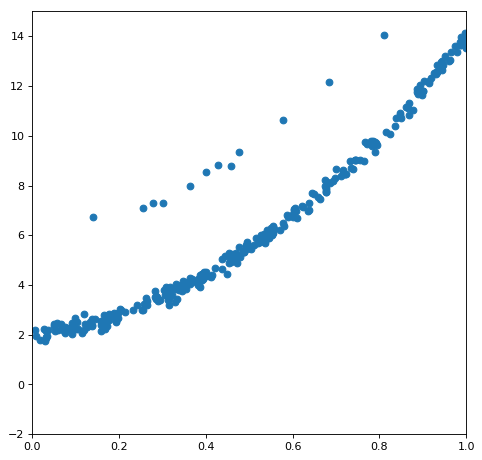

In [4]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [5]:
resulting_animation = animation.FuncAnimation(fig,animate,frames=np.arange(0,250),interval=100)

In [6]:
resulting_animation